In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd

import keras
import keras.backend
from keras import layers
from keras import models
import keras.utils


# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import math
import time
import h5py
import sklearn
from sklearn.utils import shuffle

import os

print('TensorFlow Version {}'.format(tf.__version__))

/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

TensorFlow Version 1.13.1


In [2]:
def GetPreProcessedArrays(totalVar, nXvar):
    
    setday = '072220'
    
    file_extension = str(totalVar)+'var_'+str(nXvar)+'Xvar_'+'normalized.npz'
    
    testname    = 'PreProcessing/'+setday+'/test_variables_'+file_extension
    trainname   = 'PreProcessing/'+setday+'/train_variables_'+file_extension
    examplename = 'PreProcessing/'+setday+'/example_variables_'+file_extension
    
    testvarFile    = np.load(testname)
    trainvarFile   = np.load(trainname)
    examplevarFile = np.load(examplename)
    
    testlabels    = testvarFile['labels']
    trainlabels   = trainvarFile['labels']
    examplelabels = examplevarFile['labels']
    
    test_variables    = [testvarFile[key] for key in testvarFile if (not 'label' in key and not 'vari' in key)]
    train_variables   = [trainvarFile[key] for key in trainvarFile if (not 'label' in key and not 'vari' in key)]
    example_variables = [examplevarFile[key] for key in examplevarFile if (not 'label' in key and not 'vari' in key)]
    
    return test_variables, train_variables, example_variables, testlabels, trainlabels, examplelabels
    

In [3]:
variables = []
expertVariables = []
# expertVariables = ['chMult',
#                    'jetpull',
#                    'tau1_b05',
#                    'tau2_b05',
#                    'tau3_b05',
#                    'tau1_sd_b05',
#                    'tau2_sd_b05',
#                    'tau3_sd_b05',
#                    'tau1_b10',
#                    'tau2_b10',
#                    'tau3_b10',
#                    'tau1_sd_b10',
#                    'tau2_sd_b10',
#                    'tau3_sd_b10',
#                    'tau1_b15',
#                    'tau2_b15',
#                    'tau3_b15',
#                    'tau1_sd_b15',
#                    'tau2_sd_b15',
#                    'tau3_sd_b15',
#                    'tau1_b20',
#                    'tau2_b20',
#                    'tau3_b20',
#                    'tau1_sd_b20',
#                    'tau2_sd_b20',
#                    'tau3_sd_b20',
#                    'jetMass',
#                    'jetMassSD',
#                   ]
variables = ['jetconstEta_abs',
                'jetconstE_log',
                'jetconstPt_Jetlog',
                'charge',
                'isEle',
                'isPho',
                'isMuon',
                'isCh',
                'isNh',
                'delta_eta',
                'delta_phi',
                'deltaR_jet',
                'deltaR_subjet0',
                'deltaR_subjet1',
                'dxy',
                'dz',
               ]



allVariables = ['jetconstPt_log'] + variables + expertVariables
nVar = len(variables + expertVariables)
variables_in_plots = '__'+str(nVar+1)+'var__jetconstPt_log'

totalVar = len(allVariables)
nXvar = len(expertVariables)


In [4]:
modelN = 1
patience = 2
model_name = '1DCNN_'+str(patience)+'ptc_norm_'+str(totalVar)+'var_'+str(nXvar)+'Xvar_'+str(modelN)+'.h5'

if(os.path.isfile('model/'+model_name)):
    modelN += 1
    model_name = '1DCNN_'+str(patience)+'ptc_norm_'+str(totalVar)+'var_'+str(nXvar)+'Xvar_'+str(modelN)+'.h5'


print(model_name)

1DCNN_2ptc_norm_17var_0Xvar_2.h5


In [5]:
test_variables, train_variables, example_variables, \
testlabels, trainlabels, example_labels = GetPreProcessedArrays(totalVar, nXvar)



In [6]:
print('testing variables')
for test_var in test_variables:
    print(test_var.shape)
#print(testlabels.shape)
print()

print('training variables')
for train_var in train_variables:
    print(train_var.shape)
#print(trainlabels.shape)
print()

print('example variables')
for ex_var in example_variables:
    print(ex_var.shape)
#print(example_labels.shape)    
print()

testing variables
(441390, 20, 1)
(441390, 20, 1)
(441390, 20, 1)
(441390, 20, 1)
(441390, 20, 1)
(441390, 20, 1)
(441390, 20, 1)
(441390, 20, 1)
(441390, 20, 1)
(441390, 20, 1)
(441390, 20, 1)
(441390, 20, 1)
(441390, 20, 1)
(441390, 20, 1)
(441390, 20, 1)
(441390, 20, 1)
(441390, 20, 1)

training variables
(1103470, 20, 1)
(1103470, 20, 1)
(1103470, 20, 1)
(1103470, 20, 1)
(1103470, 20, 1)
(1103470, 20, 1)
(1103470, 20, 1)
(1103470, 20, 1)
(1103470, 20, 1)
(1103470, 20, 1)
(1103470, 20, 1)
(1103470, 20, 1)
(1103470, 20, 1)
(1103470, 20, 1)
(1103470, 20, 1)
(1103470, 20, 1)
(1103470, 20, 1)

example variables
(3679, 20, 1)
(3679, 20, 1)
(3679, 20, 1)
(3679, 20, 1)
(3679, 20, 1)
(3679, 20, 1)
(3679, 20, 1)
(3679, 20, 1)
(3679, 20, 1)
(3679, 20, 1)
(3679, 20, 1)
(3679, 20, 1)
(3679, 20, 1)
(3679, 20, 1)
(3679, 20, 1)
(3679, 20, 1)
(3679, 20, 1)



In [7]:
## OLD MODEL WITHOUT EXPERT VARIABLES ## 

# def build_model(n):
    
#     inpts = []
#     xlayers = []
#     for i in range(n):
#         inpt = layers.Input(shape = (20,1))
        
#         x = layers.Conv1D(64, 3, padding = 'same', activation='relu')(inpt)
#         x = layers.Conv1D(64, 1, padding = 'same', activation='relu')(x)
#         x = layers.MaxPool1D(2)(x)
#         x = layers.Conv1D(32, 3, padding = 'same', activation='relu')(x)
#         x = layers.Conv1D(32, 1, padding = 'same', activation='relu')(x)
#         x = layers.MaxPool1D()(x)
#         x = layers.Flatten()(x)
        
#         inpts.append(inpt)
#         xlayers.append(x)
    
#     if(n > 1):
#         x = layers.concatenate(inputs=xlayers, axis=-1)

#     x = layers.Dense(64, activation='relu')(x)
#     output = layers.Dense(2, activation='softmax')(x)
#     model = models.Model(inputs=inpts, outputs=output)
#     model.compile(loss='categorical_crossentropy',
#                 optimizer='adam',
#                 metrics=['categorical_crossentropy', 'accuracy'])
    
#     return model

In [8]:
def build_model(n, nex):
    
    inpts = []
    xaugs = []
    xlayers = []
    
    # loop over all input variables
    for i in range(n):
        
        # particle list inputs 
        if(i < n-nex):

            inpt = layers.Input(shape = (20,1))

            x = layers.Conv1D(64, 3, padding = 'same', activation='relu')(inpt)
            x = layers.Conv1D(64, 1, padding = 'same', activation='relu')(x)
            x = layers.MaxPool1D(2)(x)
            x = layers.Conv1D(32, 3, padding = 'same', activation='relu')(x)
            x = layers.Conv1D(32, 1, padding = 'same', activation='relu')(x)
            x = layers.MaxPool1D()(x)
            x1 = layers.Flatten()(x)

            inpts.append(inpt)
            xlayers.append(x1)
        
        
        # expert variable inputs 
        elif((nex > 0)):

            inpt = layers.Input(shape = (1,))
            xaugs.append(inpt)
    
    #concatenation of particle list inputs with expert variable inputs
    if(n > 1):
        x = layers.concatenate(inputs=xlayers+xaugs, axis=-1)

#     x = layers.Dense(64, activation='relu')(x)
#     x = layers.Dense(128, activation='relu')(x)
    
    x = layers.Dense(512, activation='relu')(x)
    
    output = layers.Dense(2, activation='softmax')(x) 
    model = models.Model(inputs=inpts+xaugs, outputs=output)
    model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['categorical_crossentropy', 'accuracy'])
    
    return model

In [9]:
Ntotal = len(example_variables)
Nexpert = len(expertVariables)

print('N Particle List Variables:', Ntotal-Nexpert)
print('N Expert Variables:', Nexpert)

CNN = build_model( Ntotal, Nexpert )


N Particle List Variables: 17
N Expert Variables: 0
Instructions for updating:
Colocations handled automatically by placer.


In [10]:
# for lay in CNN.layers:
#     print(lay.name)

In [11]:
example_result = CNN.predict(x = example_variables)
results = CNN.evaluate(x = example_variables, y = example_labels, verbose = 0)
print(example_result)
print(results)

[[0.5038628  0.49613723]
 [0.50350577 0.4964943 ]
 [0.51402223 0.48597786]
 ...
 [0.49797326 0.5020267 ]
 [0.51236504 0.48763493]
 [0.5031637  0.49683636]]
[0.6932424960592642, 0.6932424960592642, 0.5058439793341118]


In [12]:
circleCNN = build_model( Ntotal, Nexpert )

In [13]:
example_result = circleCNN.predict(x = example_variables)
results = circleCNN.evaluate(x = example_variables, y = example_labels)
print(example_result)
print(results)

3679/3679 [==============================] - 1s 303us/step
[[0.48095113 0.5190489 ]
 [0.48324618 0.5167538 ]
 [0.4854523  0.51454777]
 ...
 [0.4916079  0.5083921 ]
 [0.48658141 0.51341856]
 [0.4811161  0.5188839 ]]
[0.6941476439321518, 0.6941476439321518, 0.5001359064963306]


In [14]:
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0:
            print('')
        print('.', end='')
    
checkpoint_path = 'model/'+model_name
if not os.path.exists("model"):
    os.mkdir("model")

# Create checkpoint callback
# cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, 
#                                                  save_best_only=True,
#                                                  verbose=1)
model_checkpoint = keras.callbacks.ModelCheckpoint(checkpoint_path, monitor='val_loss', 
                                   verbose=1, save_best_only=True, 
                                   save_weights_only=False, mode='auto', 
                                   period=1)    
EPOCHS = 50
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience)

toc = time.time()
history = circleCNN.fit(
  train_variables, trainlabels,
  epochs=EPOCHS, validation_split = 0.2, verbose = 0,
  callbacks=[early_stop, model_checkpoint])
tic = time.time()

Instructions for updating:
Use tf.cast instead.

Epoch 00001: val_loss improved from inf to 0.78126, saving model to model/1DCNN_2ptc_norm_17var_0Xvar_2.h5

Epoch 00002: val_loss improved from 0.78126 to 0.66482, saving model to model/1DCNN_2ptc_norm_17var_0Xvar_2.h5

Epoch 00003: val_loss did not improve from 0.66482

Epoch 00004: val_loss did not improve from 0.66482


In [15]:
delta = tic - toc
print('Elapsed Time: {0:0.1f} h {1:0.1f} min {2:0.2f} sec'.format(delta // 3600, delta % 3600 // 60, delta % 3600 % 60))

Elapsed Time: 0.0 h 57.0 min 14.53 sec


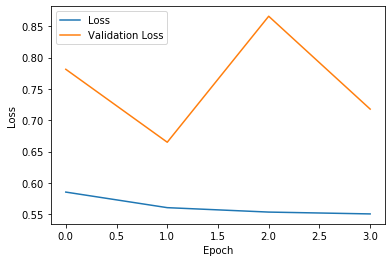

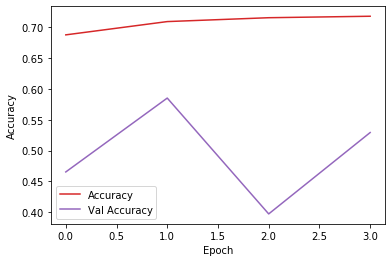

In [16]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    
    mask=slice(0,None)
    
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'][mask], hist['loss'][mask],
             label='Loss')
    plt.plot(hist['epoch'][mask], hist['val_loss'][mask],
             label = 'Validation Loss')


    plt.legend()
    plt.show()
    
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['acc'], color='C3',
             label='Accuracy')
    plt.plot(hist['epoch'], hist['val_acc'], color='C4',
             label = 'Val Accuracy')

    plt.legend()
    plt.show()


plot_history(history)




In [17]:
!ls -t model | head -1
best_model = keras.models.load_model('model/'+model_name)
best_model.summary()
results = best_model.evaluate(test_variables, testlabels)
print(results)

1DCNN_2ptc_norm_17var_0Xvar_2.h5
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_18 (InputLayer)           (None, 20, 1)        0                                            
__________________________________________________________________________________________________
input_19 (InputLayer)           (None, 20, 1)        0                                            
__________________________________________________________________________________________________
input_20 (InputLayer)           (None, 20, 1)        0                                            
__________________________________________________________________________________________________
input_21 (InputLayer)           (None, 20, 1)        0                                            
____________________________________________________________________________

441390/441390 [==============================] - 99s 224us/step
[0.5823304615532494, 0.5823304615532494, 0.6808808536668253]


In [18]:
# Plot ROC

predict = best_model.predict(test_variables)
from sklearn.metrics import roc_curve, auc

In [19]:
plt.rcParams['figure.dpi'] = 90

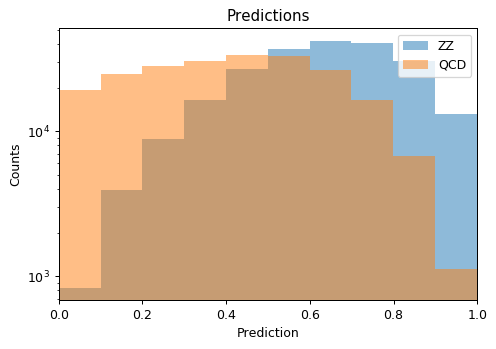

In [20]:
indqcd = np.argwhere(testlabels[:,1] == 0)
indz  = np.where(testlabels[:,1] == 1)

#hist_, bin_edges_ = np.histogram(predict[indqcd])
bins = np.linspace(0,1,10)

plt.hist([1-predict[indz, 1].flatten(),predict[indqcd, 0].flatten()],histtype='stepfilled', color=['C1','C0'], label = ['QCD', 'ZZ'], alpha=0.5)
plt.legend()
plt.title('Predictions')
plt.yscale('log')
plt.xlabel('Prediction')
plt.ylabel('Counts')
plt.xlim([0,1])
plt.show()

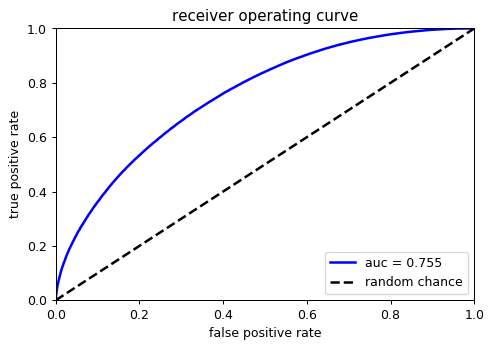

In [21]:
fpr, tpr, thresholds = roc_curve(testlabels[:,0], predict[:,0])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=2, color='b', label='auc = %.3f' % (roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k', label='random chance')
plt.xlim([0, 1.0])
plt.ylim([0, 1.0])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('receiver operating curve')
plt.legend(loc="lower right")
plt.savefig('ROC_'+str(totalVar)+'_flat.png')
np.savez('ROC_'+str(totalVar)+'_flat', false_pos_rate=fpr, true_pos_rate=tpr, auc=roc_auc, label=str(nVar+1)+'var')
plt.show()